# Machine Learning

Machine learning is the application of algorithms to extract information from datasets by way of understanding it. This "understanding" usually means fitting a model on the dataset. It overlaps considerably with data mining, where one is usually more concerned with getting the information than with the modeling aspect. It also overlaps with artificial inteligence, mathematical optimization and inferential statistics.

Few are experts on machine learning and even fewer can find the best model to match a certain dataset. But ML is becoming so ubiquitous that even school kids need to learn it. From the average person point of view, as long as the validation tests show a good fit, any model is good enough, so the question usually shifts from modeling to easy implementation and good validation procedure. The best machine learning libraries today are probably on Java, but on Python there are several libraries that also stand out, and this is a personal list:

- Scikit-learn: considered the best overall, is friendly to newcommers and contains good validation support.
- mlpy: competition.
- PyBrain: AI and neural networks.
- nltk: for natural language processing and text mining.
- Theano + Pylearn2: uses the graphical processor, for fast and "deep" learning.
- MDP (Modular toolkit for Data Processing): make workflows using scikit-learn and other libs.
- Orange: visual framework for ML (similar to what Weka is in Java). Has a bioinformatics plugin.


### [Scikit-learn](http://scikit-learn.org/stable/)

[sklearn]:http://1.bp.blogspot.com/-ME24ePzpzIM/UQLWTwurfXI/AAAAAAAAANw/W3EETIroA80/s640/drop_shadows_background.png

![sklearn-outline](http://scikit-learn.org/stable/_static/ml_map.png)

This figure was made by the creator of Scikit-learn. While the methods described in it matter less, the distinction between the covered problem classes is more important. You also have to keep in mind that this is only the simple core of ML, and there are entire classes of algorithms that are either not covered by scikit-learn (such as genetic algorithms or most neural networks) or covered in too small detail (bayesian learning). For these there are other specific Python libraries, aditionally a certain class of algorithms may only be available on a certain program or language, and bindings are usually provided for Python.

Another classification of ML problems is perhaps even more useful, and hopefully funnier, as it not only separates problem classes but creates social classes among programmers:

- Supervised learning: There is a target that we are trying to predict. Datasets for supervised learning methods specifically have several tested outcomes, and the model is using them to fit in. Mostly regression and classification methods require a target. Example: Measured omics datasets with measured phenotypes, and good controls.
- Unsupervised learning: No outcome is available, and the typical workflow consists in clustering, visualization and dimensionality reduction (feature selection). Example: "So like I have this gene expression dataset ...", most astronomical measurements, etc. Coincidentally this is what unaccomplished ML experts get to spend most of their time on.
- Reinforcement learning: A model is trained on incomplete data, and new data is added while the model improves. Here you find most of the cool sounding algorithms in ML, such the best of neural networks, markov chain monte carlo, bayesian training, etc. Most experts in RL are hired by the financial sector to work on big data (and many use python) for expensive fees. In hardcore science where things are never fully known or fully measured this class gets all the media frenzy. Robotics and gaming are also big players here.
- Ensemble learning: Using different ML algorithms on the same problem and improving a model based on all their outcomes. Decision trees and random forests find application here. Bioinformatics usually relies more and more on consensus methods, if for no other reason but to relax angry reviewers.

Some observations:

- Other learning classes exist, like the structural learning, representation learning or metric learning. They usually focus on different aspects of the dataset such as finding a good representation of the inputs or finding associations among variables.
- Many learning algorithms can perform okay on several problem classes. Also, the methodologies can come from different sources, such as statistics, optimization, AI or simple heuristics such as genetic programming or swarm intelligence.

Task:

- Take some time to explore the [documentation](http://scikit-learn.org/stable/user_guide.html) provided on scikit-learn for one or two methods of your choosing.

### Regression

Regression problems generally deal with estimating a set of unknown parameters ($\beta$) from a set of known "independent" variables $X$ such that an arbitrary function $f(X,\beta)$ (the model) can approximate a set of "dependent" variables $Y$, or $f(X,\beta)\approx Y$.

Many algorithms exists depending on $f$ being linear of non-linear, or the particularities of X and Y datasets.

**Diabetes dataset**

Most ML algorithm classes are improved to fit general datasets. Some famous standard datasets exists, such as the diabetes datasets. While many things can be learned from it, it is used especially as an example for simple regression.

> Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease 
progression one year after baseline.

- features: 10 physiological variables (age, sex, weight, blood pressure) 
- dimensions: 442 patients
- target (response): an indication of disease progression after one year 20-260

**Linear regression**

In the example below, a linear regression model is used to predict diabete. Which feature does better at predicting diabetes?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model


diabetes = datasets.load_diabetes()
#diabetes
print (diabetes.data.shape, diabetes.target.shape)
print (diabetes.data[:5,:3])

ft = 2 # feature type 0 - age, 1 - sex, 2 - bmi

X = diabetes.data[:, np.newaxis] #expand the new
print ("Expansion:", diabetes.data.shape, X.shape)
print (X[0])
print (X[0, 0, ft])

Xt = X[:, :, ft]
print (Xt.shape)
print (Xt[:5])

(442, 10) (442,)
[[ 0.03807591  0.05068012  0.06169621]
 [-0.00188202 -0.04464164 -0.05147406]
 [ 0.08529891  0.05068012  0.04445121]
 [-0.08906294 -0.04464164 -0.01159501]
 [ 0.00538306 -0.04464164 -0.03638469]]
Expansion: (442, 10) (442, 1, 10)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]]
0.0616962065187
(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]



**Crossvalidation**

Crosvalidation is a general validation method that uses a part of the dataset for training (training data) a model while the remaining rest is used to estimate how efective the model is at predicting (test data). This will split X and Y into four groups, training X, Y and testing X, Y. Usually several crossvalidation tests are done by randomly picking training variables and the training set is by convenience at 80% of the whole data.

**Goodness of fit**

1. *Residual sum of squares* (mean square error), $v = \sum (y_t - \langle y_t \rangle )^2$.
2. *Regression sum of squares* $u = \sum (y_t - y_p)^2$.
3. *R^2, the coefficient of determination*,  defined as (1 - u/v). Best possible score is 1.0, lower values are worse.

**Task**

Modify the script to perform crossvalidation on 100 randomly picked training sets. Design a crosvalidation function of your own and afterwards look for the scikit-learn's own function and use it instead. What is KFold crossvalidation?

Betas (regression coefficients): 
 [ 938.23786125]
Mean square error: 2548.07
Variance score: 0.47


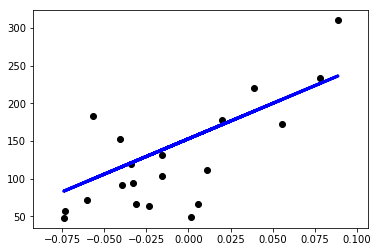

In [6]:
#Split the data into training/testing sets
X_train = Xt[:-20]
X_test = Xt[-20:]

#Split the targets into training/testing sets
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
score = regr.score(X_test, y_test)

print ('Betas (regression coefficients): \n', regr.coef_)
print("Mean square error: %.2f" % np.mean((y_predict - y_test) ** 2))
print('Variance score: %.2f' % score)

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='blue', linewidth=3)


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()
X = diabetes.data

#Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

#Split the targets into training/testing sets
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
score = regr.score(X_test, y_test)

print('Coefficients: \n', regr.coef_)
print("Mean square error: %.2f"% np.mean((y_predict - y_test) ** 2))
print('Variance score: %.2f' % score)


('Coefficients: \n', array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01]))
Mean square error: 2004.57
Variance score: 0.59


**Multivariate case, a PLS Regression example**

So far our regression target was unidimensional. The hardcore regression however involves multiple target vectors, also called multiple regression. One can still use linear regression techniques, with different corrections that take into account for many exceptions, one such being that the X matrix must be full rank in order for the least square optimization (the engine of linear regression) to work. There are also many other techniques, one my favorites being partial least least squares regression (PLS-R), which I choose to exemplify.

PLS is also called projection to *latent* structures, which mignt be more apropriate, since the multiple regression problem

$Y = XB + E$

, is solved by projecting the X and Y matrices into latent (hidden) lower dimensional space that is describing them. Just as with least square fitting ,it is difficult to explain how this is done, and it requires knowledge of [factor analysis](http://en.wikipedia.org/wiki/Factor_analysis). The end result is a decomposition into a product of score and loading matrices like this:

$X = T P^{\top} + E$

$Y = U Q^{\top} + F$

, from which the coeficient matrix B is estimated.

True B (such that: Y = XB + Err)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Estimated B
[[ 1.  1.  1.]
 [ 2.  2.  2.]
 [-0.  0.  0.]
 [-0. -0. -0.]
 [-0. -0. -0.]
 [-0. -0. -0.]
 [-0. -0. -0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [-0. -0. -0.]]
R2 0.841716030032


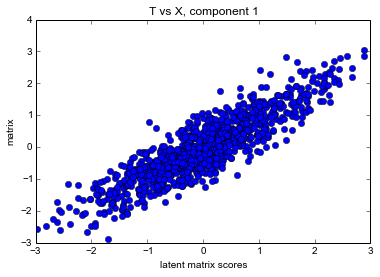

In [5]:
from  sklearn.cross_decomposition import PLSRegression

n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# each Yj = 1*X1 + 2*X2 + noize
#B = np.array([[1, 0.5, 2, 4] + [0] * (p - 4)] * q).T

Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

pls2 = PLSRegression(n_components=2)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
print(B)
# compare pls2.coefs with B
print("Estimated B")
print(np.round(pls2.coefs, 1))
Yp = pls2.predict(X)
from sklearn.metrics import r2_score
print "R2",r2_score(Y, Yp)

T, U = pls2.transform(X, Y) #Apply the dimension reduction learned on the training data

## Notice that the first component is usually well correlated with all the columns in X
cp = 0# 0 - first component, 1 -second component, etc
xc = 0# X matrix columns
import matplotlib.pyplot as plt
#plt.title(title)
plt.plot(T[:, cp], X[:,1], "ob")
#plt.plot(T[:, cp], X, "ob")
plt.title("T vs X, component "+str(cp+1))
plt.ylabel('matrix')
plt.xlabel('latent matrix scores')

**Classification problems, an SVC example**

Typically for machine learning, PLS methods have been developed to cover multiple ML classes and thus perform well in classification or feature selection problems, and have been applied notably in chemometrics.

Although I could not find a good cheminformatics training set for multiple regression, I got inspired by [this blog post](https://iwatobipen.wordpress.com/2013/09/01/pls-regression-using-scikit-learn/) and thought I could try to exemplify the next class of ML problems, with the help of a cheminformatics package with Python bindings. This package is particularly easy to install on Linux and Mac, but it is not necessary for you to install it, because I am saving the outputs.

```
On Ubuntu Linux the instalation is a one-liner
sudo apt-get install python-rdkit librdkit1 rdkit-data
```

If you download the rdkit package, you will find a ML dataset that contains as target the solubility levels for a number of molecules. Test data is also provided, and documentation is available on the same location.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cross_decomposition import PLSCanonical, PLSRegression
from sklearn import metrics
import numpy as np
import urllib
import os

os.chdir('/home/sergiun/data/work/course')
#urllib.urlretrieve("https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.train.sdf", "data/solubility.train.sdf")
#urllib.urlretrieve("https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf", "data/solubility.test.sdf")

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
nms = [ x[0] for x in Descriptors._descList ]

def calculator( mols ):
    calc = MoleculeDescriptors.MolecularDescriptorCalculator( nms )
    res = [ calc.CalcDescriptors( mol ) for mol in mols ]
    return res

trainMols = [ mol for mol in Chem.SDMolSupplier("data/solubility.train.sdf") if mol is not None]
testMols =  [ mol for mol in Chem.SDMolSupplier("data/solubility.test.sdf") if mol is not None]
 
X_train = calculator( trainMols )
X_test = calculator( testMols )

classes = { '(A) low':0, '(B) medium':1, '(C) high':2 }
Y_train = [ classes[mol.GetProp('SOL_classification')] for mol in trainMols ]
Y_test = [ classes[mol.GetProp('SOL_classification')] for mol in testMols ]

import pickle
with open("data/plsr.pkl",'w') as f:
    pickle.dump((X_train, X_test, Y_train, Y_test), f)

**SVC**

Although I could use a variant of PLS called PLS-DA to solve this classification problem, we will use another important class of algorithms called support vector machines. Support vector classification or SVC, operate by constructing higher dimensional hyperspaces where they search for [hiperplanes separating the classes through](http://en.wikipedia.org/wiki/Support_vector_machine) linear programming.

We verify our results with a [confusion matrix](http://en.wikipedia.org/wiki/Confusion_matrix).

Task: explore results with different other kernels. Which one fits best and why?

In [3]:
import pickle
import numpy as np

with open("data/plsr.pkl",'r') as f:
    X_train, X_test, Y_train, Y_test = pickle.load(f)

##one row in X_train contained nan values
Y_train = np.array(Y_train)
X_train = np.array(X_train)
print len(Y_train), np.sum(np.isnan(Y_train))
print len(X_train), np.sum(np.isnan(X_train))
nanl = np.isnan(X_train)
Y_train = Y_train[~np.isnan(X_train).any(axis=1)]
X_train = X_train[~np.isnan(X_train).any(axis=1)]
print len(Y_train), np.sum(np.isnan(Y_train))
print len(X_train), np.sum(np.isnan(X_train))

1025 0
1025 4
1024 0
1024 0


Score: 0.727626459144
Confusion matrix, without normalization
[[96  6  0]
 [45 64  6]
 [ 8  5 27]]


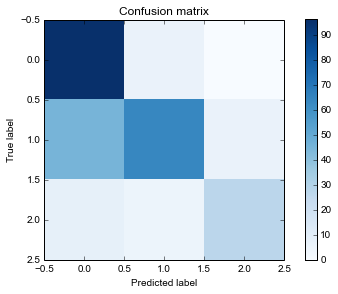

In [6]:
%matplotlib inline

from sklearn import svm, metrics
import matplotlib.pyplot as plt

svc = svm.SVC( gamma=0.001, C=100. )
svc.fit( X_train, Y_train )
Y_pred = svc.predict( X_test )
s = svc.score( X_test, Y_test )
print "Score:", s

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = metrics.confusion_matrix( Y_test, Y_pred )
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)




**Clustering, a K_means, PCA and hierarchical clustering example**

Clustering data is probably the most common machine learning exercise, and among the many methods, the most famous are Kmeans and Hierarchical Clustering.




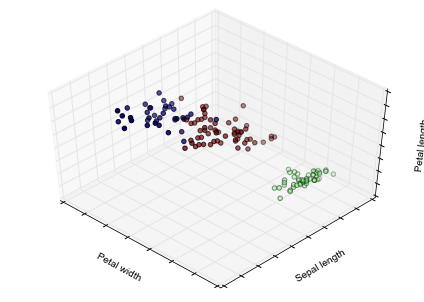

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

est = KMeans(n_clusters=3)
est.fit(X)
labels = est.labels_

# Plot the ground truth
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

**PCA (Principal Component Analysis)**

Many times our data is not full rank, which means that some variables repeat as a linear combination or others. PCA will transform the dataset into a number of uncorelated components. The first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to (i.e., uncorrelated with) the preceding components.

[]

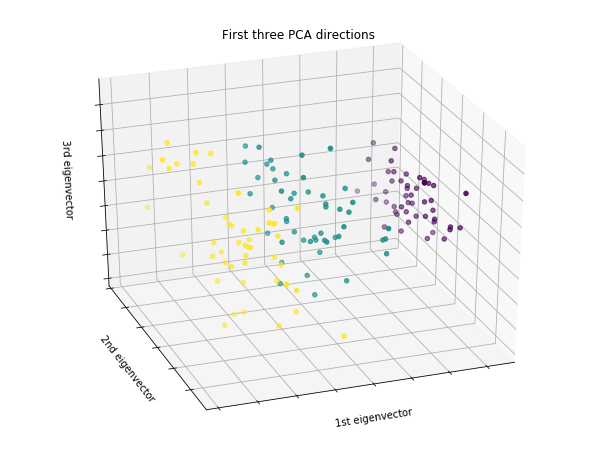

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
Y = iris.target

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
#ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y, cmap=plt.cm.Paired)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])



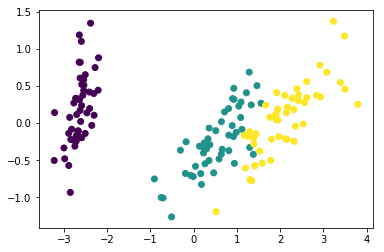

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
Y = iris.target

import matplotlib.pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)

Hierarchical Clustering will build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. We decide at what level of structured tree we are looking by specifying the desired number of clusters.

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

model = hierarchical(n_clusters=3, linkage="average", affinity="euclidean")
model.fit(X)
labels = model.labels_

# Plot the ground truth
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

NameError: name 'hierarchical' is not defined

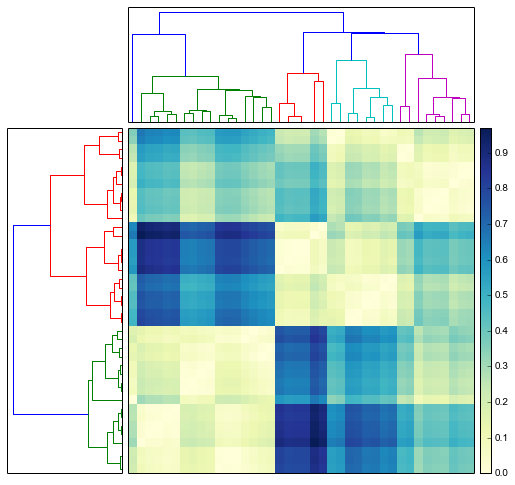

In [1]:
%matplotlib inline

import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate random features and distance matrix.
x = scipy.rand(40)
D = scipy.zeros([40,40])
for i in range(40):
    for j in range(40):
        D[i,j] = abs(x[i] - x[j])

# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method='centroid')
Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method='single')
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
#fig.show()
fig.savefig('dendrogram.png')

In [11]:
import sklearn
print sklearn.__version__

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-11-c9df3fe857a8>, line 2)